In [1]:
from riskeye.utils.data import get_all_behavior, get_all_eyepos_info, get_all_subjects, Subject
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = get_all_behavior()

In [6]:
summarized_fixations = get_all_eyepos_info(source='eyepos', summarize=True)
summarized_fixations = summarized_fixations.join(df)
summarized_fixations['Experiment'] = summarized_fixations.index.get_level_values('exptype').map({'symbolic':'Symbols', 'non-symbolic':'Coin clouds'})

In [91]:
summarized_fixations

first_saccade  last_saccade  \
subject run block trial n_saccades exptype                                
01      1   1     1     4          symbolic   left_option   left_option   
                  2     1          symbolic  right_option  right_option   
                  3     2          symbolic   left_option  right_option   
                  4     1          symbolic  right_option  right_option   
                  5     1          symbolic  right_option  right_option   
...                                                   ...           ...   
64      5   4     20    2          symbolic  right_option   left_option   
                  21    3          symbolic   left_option   left_option   
                  22    2          symbolic   left_option  right_option   
                  23    2          symbolic   left_option  right_option   
                  24    3          symbolic   left_option   left_option   

                                             left_duration  right_duration  \
subject run block trial n_saccades exptype                                   
01      1   1     1     4          symbolic          744.0           502.0   
                  2     1          symbolic            0.0           217.0   
                  3     2          symbolic          208.0           234.0   
                  4     1          symbolic            0.0           263.0   
                  5     1          symbolic            0.0           364.0   
...                                                    ...             ...   
64      5   4     20    2          symbolic          134.0           278.0   
                  21    3          symbolic          381.0           230.0   
                  22    2          symbolic          716.0           238.0   
                  23    2          symbolic          176.0           369.0   
                  24    3          symbolic         1053.0           400.0   

                                             accuracy     rt  leftRight  \
subject run block trial n_saccades exptype                                
01      1   1     1     4          symbolic       1.0  1.215        1.0   
                  2     1          symbolic       1.0  0.737       -1.0   
                  3     2          symbolic       1.0  0.920       -1.0   
                  4     1          symbolic       1.0  0.965       -1.0   
                  5     1          symbolic       1.0  1.218        1.0   
...                                               ...    ...        ...   
64      5   4     20    2          symbolic       1.0  1.046       -1.0   
                  21    3          symbolic       0.0  0.840        1.0   
                  22    2          symbolic       0.0  0.671        1.0   
                  23    2          symbolic       0.0  0.774        1.0   
                  24    3          symbolic       1.0  0.874        1.0   

                                             pressedKey  n_safe  n_risky  ...  \
subject run block trial n_saccades exptype                                ...   
01      1   1     1     4          symbolic        75.0    14.0     47.0  ...   
                  2     1          symbolic        77.0     5.0      6.0  ...   
                  3     2          symbolic        77.0    14.0     17.0  ...   
                  4     1          symbolic        77.0    10.0     12.0  ...   
                  5     1          symbolic        75.0    14.0     28.0  ...   
...                                                 ...     ...      ...  ...   
64      5   4     20    2          symbolic        77.0    28.0     79.0  ...   
                  21    3          symbolic        75.0    20.0     57.0  ...   
                  22    2          symbolic        75.0    10.0     20.0  ...   
                  23    2          symbolic        75.0    20.0     40.0  ...   
                  24    3          symbolic        75.0    28.0     29.0  ...   

                       

In [90]:
summarized_fixations.reset_index().groupby(['subject'])['n_saccades'].mean().sort_values()

subject
58     0.053333
05     1.252500
54     1.513216
59     1.521964
53     1.757238
        ...    
06     5.410417
17     6.552083
48     7.219089
27    30.843552
62    91.466667
Name: n_saccades, Length: 63, dtype: float64

In [65]:
order = ['Coin clouds', 'Symbols']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_64202/2609358405.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  p = sns.histplot(data=summarized_fixations.reset_index(), x='n_saccades', hue='Experiment', bins=np.arange(-.5, 9.5, 1), multiple="dodge", shrink=.85, stat='percent', palette=sns.color_palette()[-3:], hue_order=order)


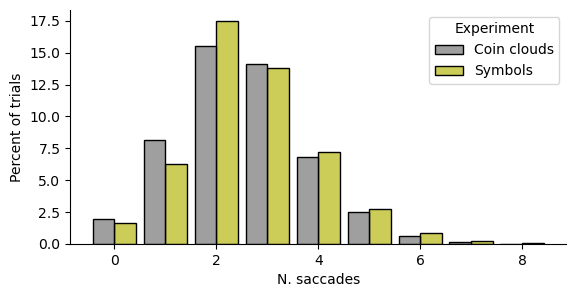

In [79]:
summarized_fixations
p = sns.histplot(data=summarized_fixations.reset_index(), x='n_saccades', hue='Experiment', bins=np.arange(-.5, 9.5, 1), multiple="dodge", shrink=.85, stat='percent', palette=sns.color_palette()[-3:], hue_order=order)
p.set_ylabel('Percent of trials')
p.set_xlabel('N. saccades')

p.set_aspect(1/4.)
sns.despine()


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_64202/1712350968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_64202/1712350968.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)


([0, 1], [Text(0, 0, 'Coin clouds'), Text(1, 0, 'Symbols')])

/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


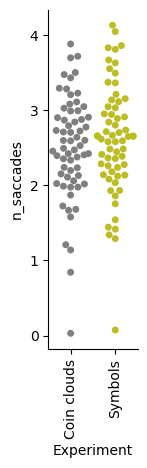

In [84]:
g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)
sns.despine()
# g.set(aspect=4)
plt.tight_layout()
plt.gcf().set_size_inches(1, 4)
plt.xticks(rotation = 90) 

In [128]:
def merge_fixations(d):
    d['previous_fixation_target'] = d['fixation_target'].shift(1)

    result = []

    n = 1
    duration = 0.0

    for ix, row in d.iterrows():
        if (row.fixation_target == row['previous_fixation_target']) or (pd.isnull(row.previous_fixation_target)):
            duration += row.duration
        else:
            result.append({'duration':duration, 'fixation_target':row.previous_fixation_target})
            duration = row.duration
            n += 1

    if duration != 0:
        result.append({'duration':duration, 'fixation_target':row.fixation_target})

    return pd.DataFrame(result, index=pd.Index(np.arange(1, n+1), name='n'))



In [132]:
fixations = fixations[np.in1d(fixations['fixation_target'], ['left_option', 'right_option'])].droplevel('n')

fixations = fixations.groupby(['subject', 'run', 'block', 'trial']).apply(merge_fixations)

In [133]:
df['EV_left'] = df['p_left'] * df['n_left']
df['EV_right'] = df['p_right'] * df['n_right']
fixations = fixations.join(df[['EV_left', 'EV_right', 'n_safe', 'n_risky', 'n_left', 'n_right', 'chose_risky', 'log(risky/safe)']])
fixations = fixations.join((df['p_left'] == 0.55).to_frame('risky_left'))

fixations['risky_left'] = fixations['risky_left'].astype(bool)
fixations['chose_risky'] = fixations['chose_risky'].astype(bool)

fixations['risky_fixation'] = ((fixations['fixation_target'] == 'left_option') & fixations['risky_left']) | ((fixations['fixation_target'] == 'right_option') & ~fixations['risky_left'])
fixations['left_fixation'] = (fixations['fixation_target'] == 'left_option')

fixations['safe_fixation'] = ~fixations['risky_fixation'] 
fixations['chosen_fixation'] = (fixations['chose_risky']  & fixations['risky_fixation']) | (~fixations['chose_risky'] & fixations['safe_fixation'])

In [134]:
last_fixations = fixations.groupby(['subject', 'exptype', 'run', 'block', 'trial']).apply(lambda d: d.reset_index('n').iloc[-1])
last_fixations['n'] = 'last'
last_fixations.set_index('n', append=True, inplace=True)

In [ ]:
sns.histplot(fixations)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1989454365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1989454365.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


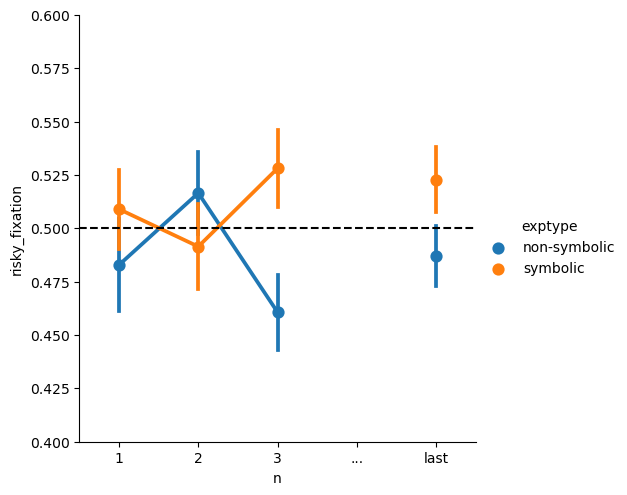

In [161]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
tmp = pd.concat((tmp, pd.DataFrame({'subject':np.nan, 'exptype':['symbolic', 'non-symbolic'], 'n':'...'}).set_index(tmp.index.names)))
sns.catplot(data=tmp.reset_index(), x='n', y='risky_fixation', hue='exptype', kind='point', errorbar='se', order=[1,2,3,'...', 'last'])
plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/982400195.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/982400195.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


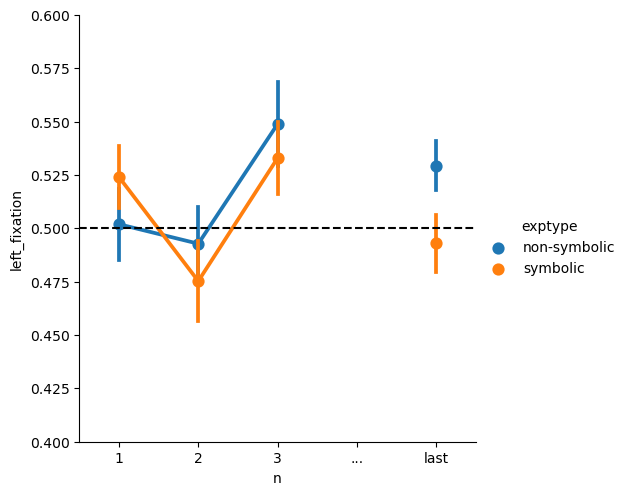

In [156]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
tmp = pd.concat((tmp, pd.DataFrame({'subject':np.nan, 'exptype':['symbolic', 'non-symbolic'], 'n':'...'}).set_index(tmp.index.names)))
sns.catplot(data=tmp.reset_index(), x='n', y='left_fixation', hue='exptype', kind='point', errorbar='se', order=[1,2,3,'...', 'last'])
plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1989454365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1989454365.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


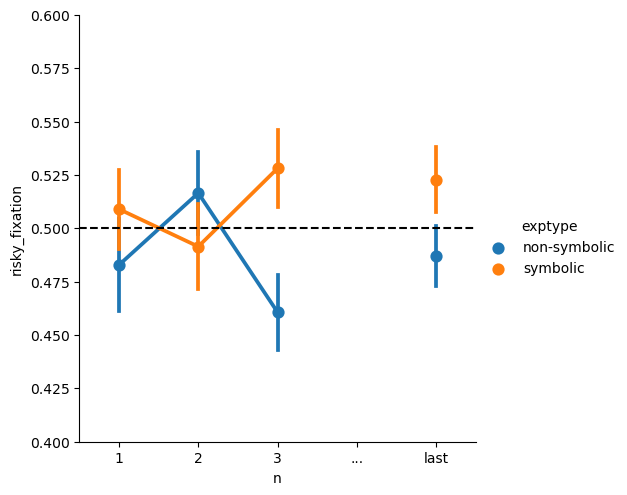

In [155]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
tmp = pd.concat((tmp, pd.DataFrame({'subject':np.nan, 'exptype':['symbolic', 'non-symbolic'], 'n':'...'}).set_index(tmp.index.names)))
sns.catplot(data=tmp.reset_index(), x='n', y='risky_fixation', hue='exptype', kind='point', errorbar='se', order=[1,2,3,'...', 'last'])
plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2483745969.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2483745969.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


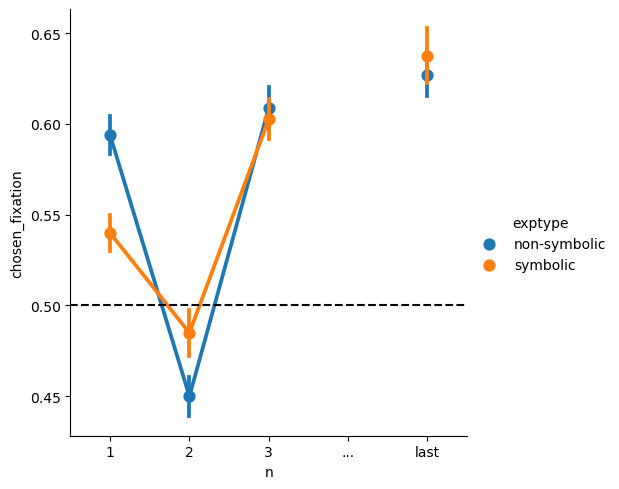

In [164]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
tmp = pd.concat((tmp, pd.DataFrame({'subject':np.nan, 'exptype':['symbolic', 'non-symbolic'], 'n':'...'}).set_index(tmp.index.names)))
sns.catplot(data=tmp.reset_index(), x='n', y='chosen_fixation', hue='exptype', kind='point', errorbar='se', order=[1,2,3,'...', 'last'])
# plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/680412679.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/680412679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


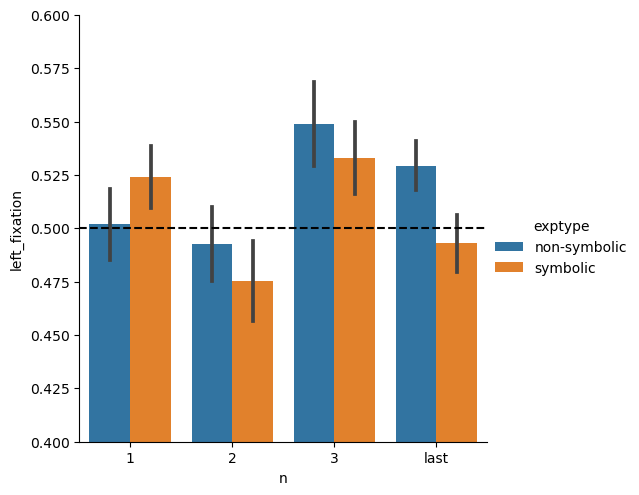

In [90]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
sns.catplot(data=tmp.reset_index(), x='n', y='left_fixation', hue='exptype', kind='bar', errorbar='se')
plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/4081881057.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/4081881057.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))


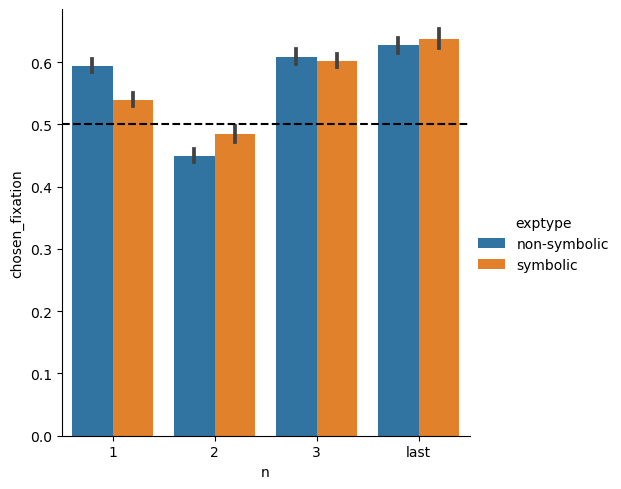

In [91]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
tmp = pd.concat((tmp.query('n < 4'), last_fixations.groupby(['subject', 'exptype', 'n']).mean()))
sns.catplot(data=tmp.reset_index(), x='n', y='chosen_fixation', hue='exptype', kind='bar', errorbar='se')
# plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3393459346.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()


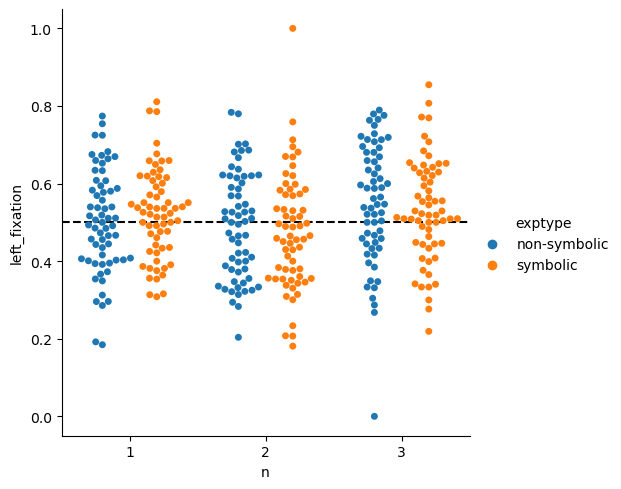

In [92]:
tmp = fixations.groupby(['subject', 'exptype', 'n']).mean()
sns.catplot(data=tmp.query('n < 4').reset_index(), x='n', y='left_fixation', hue='exptype', kind='swarm', errorbar='se', dodge=True)
# plt.ylim(.4, .6)
plt.axhline(0.5, c='k', ls='--')

In [93]:
fixations['EV_fixated'] = fixations['EV_left'].where(fixations['left_fixation'], fixations['EV_right'])
fixations['n_fixated'] = fixations['n_left'].where(fixations['left_fixation'], fixations['n_right'])

In [94]:
fixations['EV_risky'] = fixations['EV_left'].where(fixations['risky_left'], fixations['EV_right'])
fixations['EV_safe'] = fixations['EV_left'].where(~fixations['risky_left'], fixations['EV_right'])

In [105]:
fixations['bin(EV_fixated)'] = pd.cut(fixations['EV_fixated'], bins=np.arange(0, 120, 5))
fixations['bin(EV_fixated)'].cat.categories = [bin.mid for bin in fixations['bin(EV_fixated)'].cat.categories]

fixations['bin(EV_left)'] = pd.cut(fixations['EV_left'], bins=np.arange(0, 120, 5))
fixations['bin(EV_left)'].cat.categories = [bin.mid for bin in fixations['bin(EV_left)'].cat.categories]

fixations['bin(EV_risky)'] = pd.cut(fixations['EV_risky'], bins=np.arange(0, 120, 10))
fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in fixations['bin(EV_risky)'].cat.categories]

fixations['bin(log(risky/safe))'] = pd.qcut(fixations['log(risky/safe)'], q=7)
fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in fixations['bin(log(risky/safe))'].cat.categories]

last_fixations = fixations.groupby(['subject', 'exptype', 'run', 'block', 'trial']).apply(lambda d: d.reset_index('n').iloc[-1])
last_fixations['n'] = 'last'
last_fixations.set_index('n', append=True, inplace=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2068855593.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_fixated)'].cat.categories = [bin.mid for bin in fixations['bin(EV_fixated)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2068855593.py:5: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_left)'].cat.categories = [bin.mid for bin in fixations['bin(EV_left)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2068855593.py:8: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in fixations['bin(EV_risky)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipyk

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1868765463.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1868765463.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/1868765463.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'EV_safe', 'n',

KeyError: "['bin(EV_risky)'] not in index"

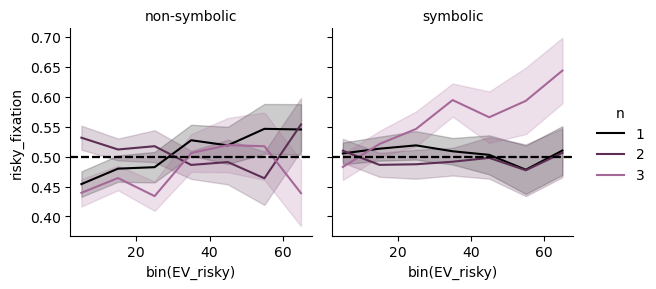

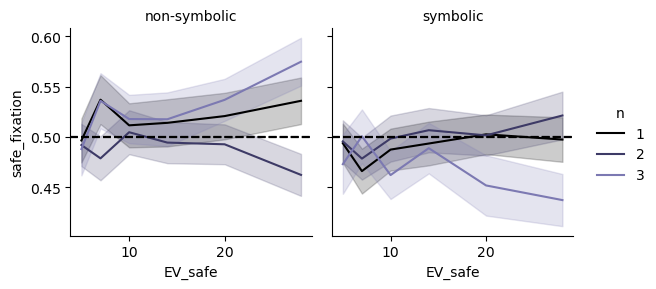

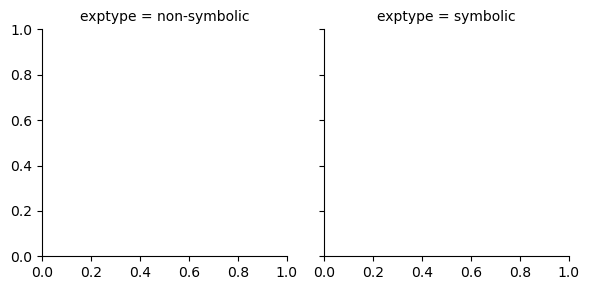

In [120]:
tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]

palette = sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.5, n_colors=3, reverse=True)

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'risky_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))

tmp = fixations.groupby(['subject', 'EV_safe', 'n', 'exptype']).mean()
palette = sns.cubehelix_palette(start=0, rot=0, dark=0, light=.5, n_colors=3, reverse=True)
g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'safe_fixation', errorbar='se')
g.add_legend()
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set_titles('{col_name}')



/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3884017233.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3884017233.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]


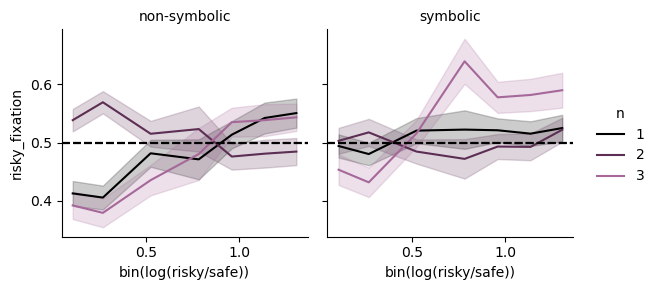

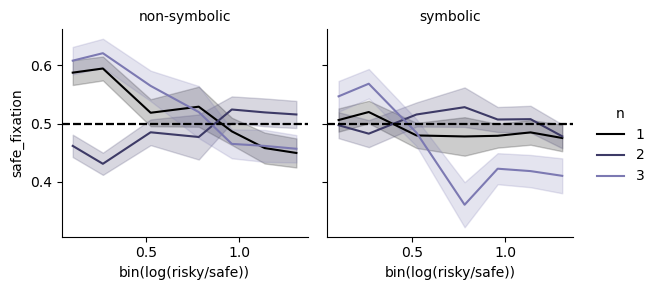

In [107]:
tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]

palette = sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.5, n_colors=3, reverse=True)

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'risky_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))

palette = sns.cubehelix_palette(start=0, rot=0, dark=0, light=.5, n_colors=3, reverse=True)
g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'safe_fixation', errorbar='se')
g.add_legend()
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3910912719.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3910912719.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3910912719.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'EV_safe',

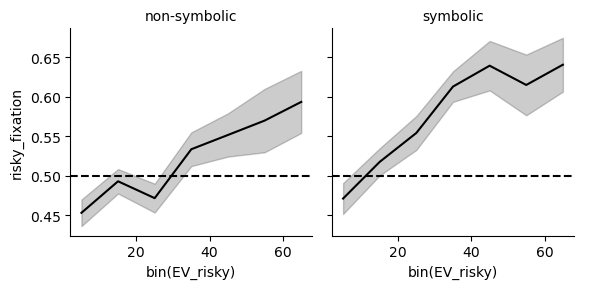

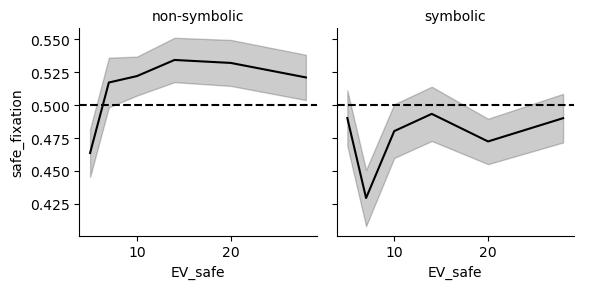

In [108]:
tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]


g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'risky_fixation', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))


tmp = last_fixations.groupby(['subject', 'EV_safe', 'exptype']).mean()
g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'safe_fixation', errorbar='se', color='k')
g.add_legend()
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2532038199.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'bin(log(risky/safe))', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2532038199.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'bin(log(risky/safe))', 'exptype', 'n_safe']).mean()


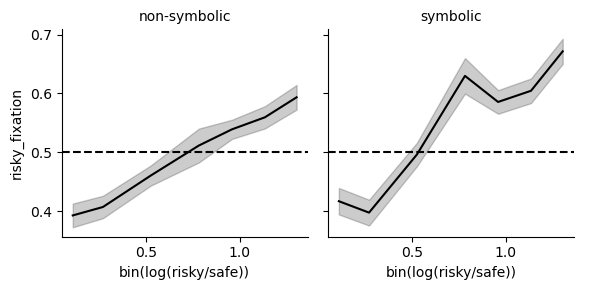

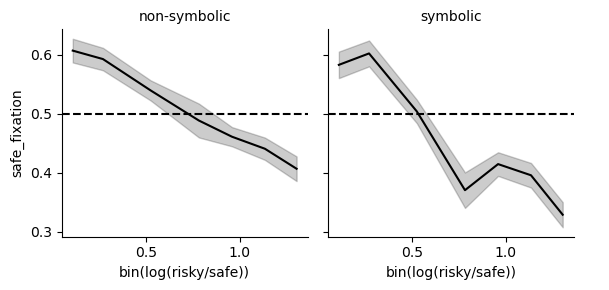

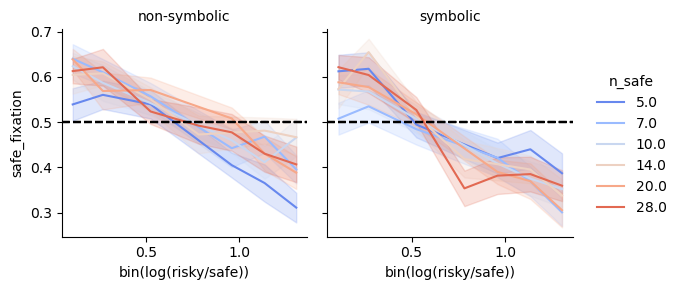

In [109]:
tmp = last_fixations.groupby(['subject', 'bin(log(risky/safe))', 'exptype']).mean()

g = sns.FacetGrid(tmp.reset_index(), col='exptype', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'risky_fixation', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))

g = sns.FacetGrid(tmp.reset_index(), col='exptype', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'safe_fixation', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))


tmp = last_fixations.groupby(['subject', 'bin(log(risky/safe))', 'exptype', 'n_safe']).mean()
g = sns.FacetGrid(tmp.reset_index(), col='exptype', hue='n_safe', palette='coolwarm')#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'safe_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
# tmp = last_fixations.groupby(['subject', 'EV_safe', 'exptype']).mean()
# palette = sns.cubehelix_palette(start=0, rot=0, dark=0, light=.5, n_colors=3, reverse=True)
# g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', palette=palette)#, palette='coolwarm')
# g.map(sns.lineplot, 'EV_safe', 'safe_fixation', errorbar='se')
# g.add_legend()
# g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
# g.set_titles('{col_name}')

In [110]:
fixations['duration'].clip(0, 1000, inplace=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3835200895.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3835200895.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3835200895.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'EV_safe', 'n',

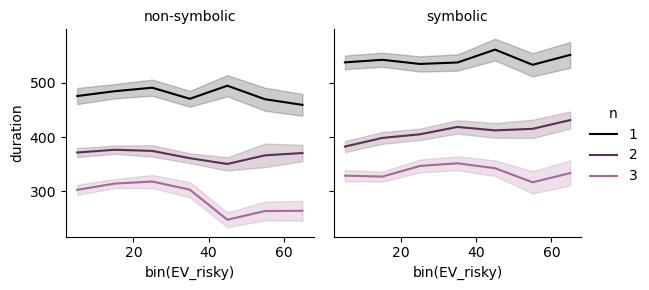

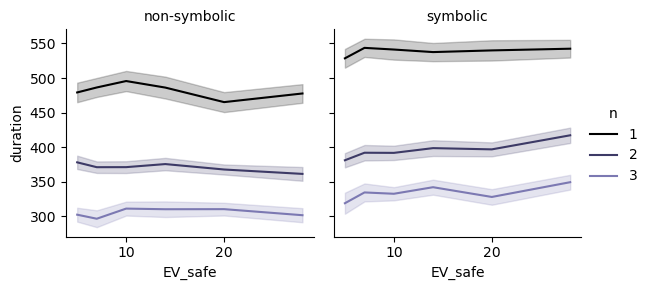

In [112]:
tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]

palette = sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.5, n_colors=3, reverse=True)

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')

tmp = fixations.groupby(['subject', 'EV_safe', 'n', 'exptype']).mean()
palette = sns.cubehelix_palette(start=0, rot=0, dark=0, light=.5, n_colors=3, reverse=True)
g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3642866267.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3642866267.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/3642866267.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(log

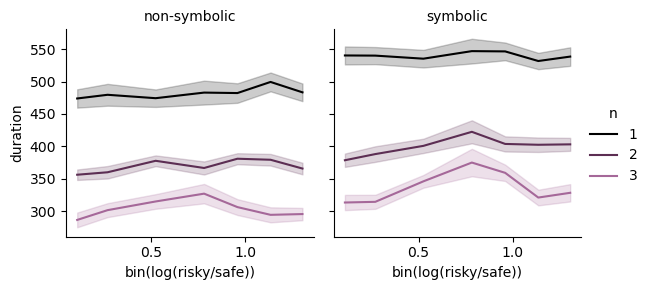

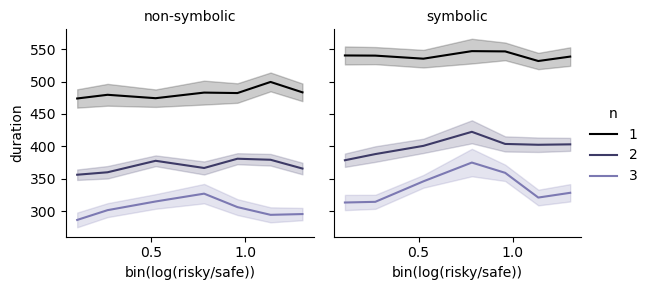

In [113]:
tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]

palette = sns.cubehelix_palette(start=.5, rot=0, dark=0, light=.5, n_colors=3, reverse=True)

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')

tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'exptype']).mean()
palette = sns.cubehelix_palette(start=0, rot=0, dark=0, light=.5, n_colors=3, reverse=True)
g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='exptype', hue='n', palette=palette)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'EV_safe',

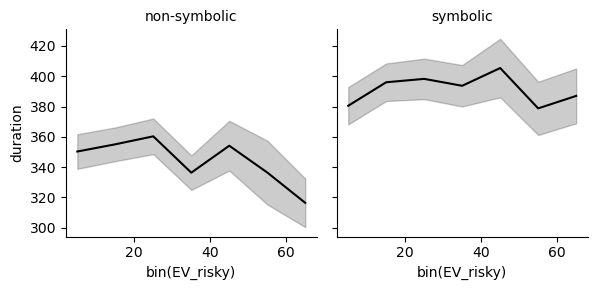

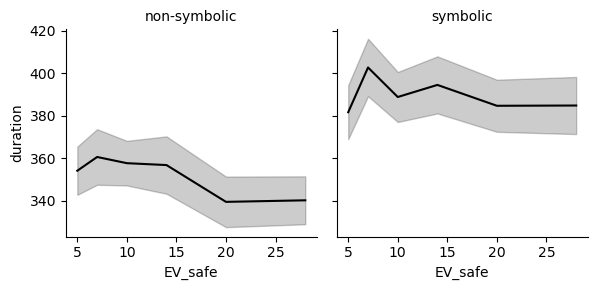

In [114]:
tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]


g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'duration', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')


tmp = last_fixations.groupby(['subject', 'EV_safe', 'exptype']).mean()
g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'duration', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')

# Proportional dwell time

In [ ]:
eyepos = get_all_eyepos_info()

In [ ]:
eyepos = eyepos.join(df)

In [ ]:
eyepos['risky_dwelltime'] = eyepos['left_duration'].where(eyepos['p_left'] == 0.55, eyepos['right_duration'])
eyepos['safe_dwelltime'] = eyepos['left_duration'].where(eyepos['p_left'] == 1.0, eyepos['right_duration'])
eyepos['fixation_duration'] = eyepos['risky_dwelltime'] + eyepos['safe_dwelltime']

eyepos['risky_dwelltime_prop'] = eyepos['risky_dwelltime'] / eyepos['fixation_duration']
eyepos['safe_dwelltime_prop'] = eyepos['risky_dwelltime'] / eyepos['fixation_duration']

In [ ]:
eyepos['EV_risky'] = eyepos['EV_left'].where(eyepos['p_left'] == 0.55, eyepos['EV_right'])
eyepos['EV_safe'] = eyepos['EV_left'].where(eyepos['p_right'] == 0.55, eyepos['EV_right'])

In [ ]:
eyepos['bin(EV_risky)'] = pd.cut(eyepos['EV_risky'], bins=np.arange(0, 120, 10))
eyepos['bin(EV_risky)'].cat.categories = [bin.mid for bin in eyepos['bin(EV_risky)'].cat.categories]

eyepos['bin(EV_safe)'] = pd.cut(eyepos['EV_safe'], bins=np.arange(0, 120, ))
eyepos['bin(EV_safe)'].cat.categories = [bin.mid for bin in eyepos['bin(EV_safe)'].cat.categories]

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_83412/4003034342.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  eyepos['bin(EV_risky)'].cat.categories = [bin.mid for bin in eyepos['bin(EV_risky)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_83412/4003034342.py:5: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  eyepos['bin(EV_safe)'].cat.categories = [bin.mid for bin in eyepos['bin(EV_safe)'].cat.categories]


In [ ]:
eyepos

n_saccades first_saccade  last_saccade  \
subject run block trial exptype                                            
01      1   1     1     symbolic           6   left_option   left_option   
                  2     symbolic           3  right_option  right_option   
                  3     symbolic           2   left_option  right_option   
                  4     symbolic           1  right_option  right_option   
                  5     symbolic           1  right_option  right_option   
...                                      ...           ...           ...   
64      5   4     20    symbolic           2  right_option   left_option   
                  21    symbolic           3   left_option   left_option   
                  22    symbolic           3   left_option  right_option   
                  23    symbolic           2   left_option  right_option   
                  24    symbolic           3   left_option   left_option   

                                  left_duration  right_duration  accuracy  \
subject run block trial exptype                                             
01      1   1     1     symbolic         1024.0           462.0       1.0   
                  2     symbolic          204.0           478.0       1.0   
                  3     symbolic          168.0           232.0       1.0   
                  4     symbolic            0.0           282.0       1.0   
                  5     symbolic            0.0           358.0       1.0   
...                                         ...             ...       ...   
64      5   4     20    symbolic          156.0           264.0       1.0   
                  21    symbolic          382.0           196.0       0.0   
                  22    symbolic          872.0           246.0       0.0   
                  23    symbolic          170.0           378.0       0.0   
                  24    symbolic         1050.0           374.0       1.0   

                                     rt  leftRight  pressedKey  n_safe  ...  \
subject run block trial exptype                                         ...   
01      1   1     1     symbolic  1.215        1.0        75.0    14.0  ...   
                  2     symbolic  0.737       -1.0        77.0     5.0  ...   
                  3     symbolic  0.920       -1.0        77.0    14.0  ...   
                  4     symbolic  0.965       -1.0        77.0    10.0  ...   
                  5     symbolic  1.218        1.0        75.0    14.0  ...   
...                                 ...        ...         ...     ...  ...   
64      5   4     20    symbolic  1.046       -1.0        77.0    28.0  ...   
                  21    symbolic  0.840        1.0        75.0    20.0  ...   
                  22    symbolic  0.671        1.0        75.0    10.0  ...   
                  23    symbolic  0.774        1.0        75.0    20.0  ...   
                  24    symbolic  0.874        1.0        75.0    28.0  ...   

                                  EV_right  risky_dwelltime  safe_dwelltime  \
subject run block trial exptype                                               
01      1   1     1     symbolic     14.00           1024.0           462.0   
                  2     symbolic      5.00            204.0           478.0   
                  3     symbolic     14.00            168.0           232.0   
                  4     symbolic     10.00              0.0           282.0   
                  5     symbolic     14.00              0.0           358.0   
...                                    ...              ...             ...   
64      5   4     20    symbolic     43.45            264.0           156.0   
                  21    symbolic     31.35            196.0           382.0   
                  22    symbolic     11.00            246.0           872.0   
                  23    symbolic     22.00            378.0           170.0   
                  24    symbolic     15.95            374.0        